# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20m/h)') ( 1, b'Speed limit (30m/h)')
    - ( 2, b'Speed limit (50m/h)') ( 3, b'Speed limit (60m/h)')
    - ( 4, b'Speed limit (70m/h)') ( 5, b'Speed limit (80m/h)')
    - ( 6, b'End of speed limit (80m/h)') ( 7, b'Speed limit (100m/h)')
    - ( 8, b'Speed limit (120m/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')




# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, Y_train = train['features'], train['labels']
X_validation, Y_validation = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

In [6]:
len(X_validation)

4410

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
Y_train.shape

(34799,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

# STEP 2: IMAGE EXPLORATION

41

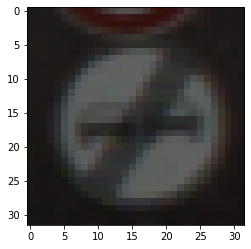

In [13]:
i = 23
plt.imshow(X_train[i]) # Show images are not shuffled
Y_train[i]

31

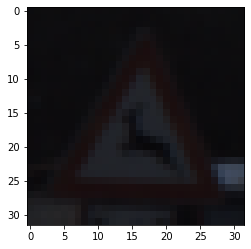

In [14]:
i = 56
plt.imshow(X_validation[i]) # Show images are not shuffled
Y_validation[i]

41

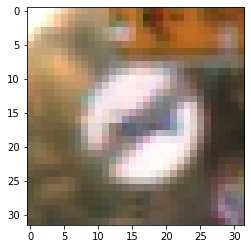

In [15]:
i = 123
plt.imshow(X_train[i]) # Show images are not shuffled
Y_train[i]

# STEP 3: DATA PREPARATION

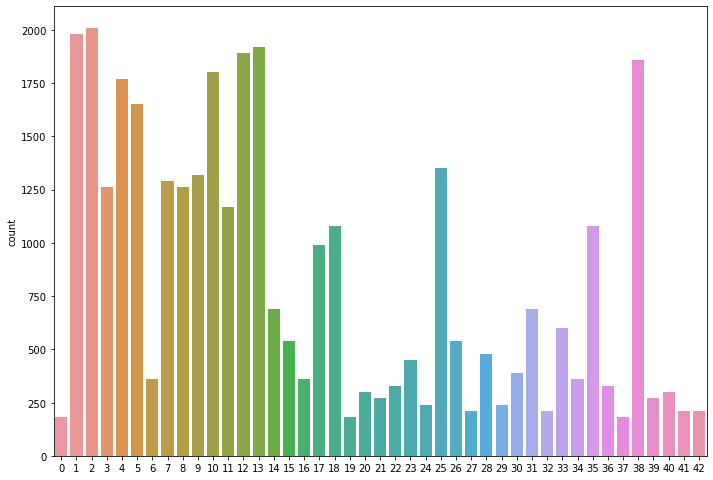

In [14]:
a4_dims = (11.7, 8.27)
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(Y_train, ax =ax, label = "Count")

In [15]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [16]:
len(X_train)

34799

In [17]:
X_train.shape

(34799, 32, 32, 3)

In [18]:
X_train = np.sum(X_train/3, axis=3)
X_test  = np.sum(X_test/3, axis=3)
X_validation  = np.sum(X_validation/3, axis=3) 

In [19]:
import cv2
from skimage.filters import prewitt_h,prewitt_v

In [20]:
train_1 = []
for i in range(len(X_train)):
    vertical = prewitt_h(X_train[i])
    train_1.append(vertical)
    

In [21]:
test_1 = []
for i in range(len(X_test)):
    vertical = prewitt_h(X_test[i])
    test_1.append(vertical)

In [22]:
validation_1 = []
for i in range(len(X_validation)):
    vertical = prewitt_h(X_validation[i])
    validation_1.append(vertical)

In [23]:
train_data=[]
side = 20
channels = 1

for i in range (0,len(train_1)):
        train_image = train_1[i]
        image_resized = cv2.resize(train_image, (side, side), interpolation = cv2.INTER_AREA)
        train_data.append(np.array(image_resized))

In [24]:
test_data=[]
side = 20
channels = 1

for i in range (0,len(test_1)):
        train_image = test_1[i]
        image_resized = cv2.resize(train_image, (side, side), interpolation = cv2.INTER_AREA)
        test_data.append(np.array(image_resized))

In [25]:
validation_data=[]
side = 20
channels = 1

for i in range (0,len(validation_1)):
        train_image = validation_1[i]
        image_resized = cv2.resize(train_image, (side, side), interpolation = cv2.INTER_AREA)
        validation_data.append(np.array(image_resized))

In [26]:
def clean(data):
    data = np.array(data)
    data = data.reshape((data.shape[0], 20*20*1))
    data = data.astype(float)/255
    return data

In [27]:
X_train = clean(train_data)
X_test = clean(test_data)
X_validation = clean(validation_data)

In [28]:
X_train.shape

(34799, 400)

In [29]:
labels = np.array(Y_validation)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(Y_train)
labels = le.fit_transform(Y_test)
labels = le.fit_transform(Y_validation)

# Random Forest

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

# Predicting Training Set Results 


In [31]:
Y_pred_train = model.predict(X_train)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00      1980
           2       1.00      1.00      1.00      2010
           3       1.00      1.00      1.00      1260
           4       1.00      1.00      1.00      1770
           5       1.00      1.00      1.00      1650
           6       1.00      1.00      1.00       360
           7       1.00      1.00      1.00      1290
           8       1.00      1.00      1.00      1260
           9       1.00      1.00      1.00      1320
          10       1.00      1.00      1.00      1800
          11       1.00      1.00      1.00      1170
          12       1.00      1.00      1.00      1890
          13       1.00      1.00      1.00      1920
          14       1.00      1.00      1.00       690
          15       1.00      1.00      1.00       540
          16       1.00      1.00      1.00       360
          17       1.00    

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred_train, Y_train)) 

1.0


# Predicting Test Set results

In [34]:
Y_pred_test = model.predict(X_test)

In [35]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        60
           1       0.84      0.95      0.89       720
           2       0.86      0.95      0.90       750
           3       0.90      0.92      0.91       450
           4       0.96      0.95      0.95       660
           5       0.80      0.78      0.79       630
           6       0.89      0.73      0.80       150
           7       0.94      0.93      0.93       450
           8       0.88      0.92      0.90       450
           9       0.92      0.99      0.95       480
          10       0.92      0.98      0.95       660
          11       0.83      0.90      0.86       420
          12       0.94      0.96      0.95       690
          13       0.97      1.00      0.98       720
          14       0.99      0.96      0.98       270
          15       0.92      0.92      0.92       210
          16       1.00      0.95      0.97       150
          17       0.99    

In [36]:
print(accuracy_score(Y_test, Y_pred_test))

0.9057007125890736


# Predicting Validation Set Results

In [37]:
Y_pred_valid = model.predict(X_validation)

In [38]:
print(classification_report(Y_validation, Y_pred_valid))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.84      0.88      0.86       240
           2       0.95      0.88      0.91       240
           3       0.86      0.97      0.91       150
           4       0.93      0.97      0.95       210
           5       0.82      0.80      0.81       210
           6       0.75      1.00      0.86        60
           7       0.91      0.96      0.94       150
           8       0.92      0.90      0.91       150
           9       0.97      0.93      0.95       150
          10       0.91      1.00      0.95       210
          11       0.77      0.93      0.84       150
          12       0.82      0.98      0.89       210
          13       0.98      1.00      0.99       240
          14       1.00      0.99      0.99        90
          15       0.96      0.98      0.97        90
          16       0.98      0.98      0.98        60
          17       0.99    

In [39]:
print(accuracy_score(Y_validation, Y_pred_valid)) 

0.9004535147392291


# SVM

In [40]:
#SVM
from sklearn import svm
model_1 = svm.SVC()
model_1.fit(X_train, Y_train)

SVC()

# Predicting Training Set Results 

In [41]:
Y_pred_train = model_1.predict(X_train)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       180
           1       0.99      0.94      0.97      1980
           2       0.98      0.96      0.97      2010
           3       0.96      0.92      0.94      1260
           4       0.94      0.98      0.96      1770
           5       0.82      0.97      0.89      1650
           6       0.98      0.98      0.98       360
           7       0.99      0.91      0.95      1290
           8       0.95      0.94      0.95      1260
           9       1.00      0.94      0.97      1320
          10       0.88      0.99      0.93      1800
          11       0.98      0.97      0.97      1170
          12       0.94      0.98      0.96      1890
          13       0.99      1.00      0.99      1920
          14       0.99      1.00      0.99       690
          15       1.00      0.97      0.98       540
          16       1.00      0.96      0.98       360
          17       0.98    

In [43]:
print(accuracy_score(Y_pred_train, Y_train)) 

0.9596252765884077


# Predicting Test Set Results

In [44]:
Y_pred_test = model_1.predict(X_test)

In [45]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        60
           1       0.72      0.89      0.80       720
           2       0.79      0.87      0.83       750
           3       0.64      0.76      0.70       450
           4       0.85      0.80      0.82       660
           5       0.61      0.76      0.68       630
           6       0.82      0.64      0.72       150
           7       0.92      0.67      0.78       450
           8       0.83      0.82      0.82       450
           9       0.93      0.78      0.85       480
          10       0.73      0.94      0.82       660
          11       0.71      0.82      0.76       420
          12       0.67      0.96      0.79       690
          13       0.87      0.96      0.91       720
          14       0.93      0.87      0.90       270
          15       0.92      0.59      0.72       210
          16       0.95      0.94      0.95       150
          17       0.98    

In [46]:
print(accuracy_score(Y_test, Y_pred_test))

0.7937450514647665


# Predicting Validation Set Results

In [47]:
Y_pred_valid = model_1.predict(X_validation)

In [48]:
print(classification_report(Y_validation, Y_pred_valid))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.70      0.76      0.73       240
           2       0.72      0.76      0.74       240
           3       0.69      0.91      0.78       150
           4       0.65      0.95      0.77       210
           5       0.62      0.70      0.66       210
           6       0.60      0.98      0.74        60
           7       0.98      0.69      0.81       150
           8       0.80      0.72      0.76       150
           9       0.90      0.80      0.85       150
          10       0.81      0.94      0.87       210
          11       0.56      0.90      0.69       150
          12       0.65      0.99      0.78       210
          13       0.78      0.99      0.87       240
          14       0.98      0.93      0.95        90
          15       0.94      0.68      0.79        90
          16       1.00      0.18      0.31        60
          17       1.00    

In [49]:
print(accuracy_score(Y_validation, Y_pred_valid)) 

0.753968253968254


# Naive Bayes

In [50]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2.fit(X_train, Y_train)

GaussianNB()

# Predicting Training Set Results 

In [51]:
Y_pred_train = model_2.predict(X_train)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.17      0.69      0.27       180
           1       0.64      0.35      0.45      1980
           2       0.68      0.38      0.48      2010
           3       0.21      0.18      0.19      1260
           4       0.39      0.25      0.30      1770
           5       0.28      0.20      0.23      1650
           6       0.18      0.84      0.30       360
           7       0.53      0.17      0.26      1290
           8       0.28      0.22      0.25      1260
           9       0.78      0.59      0.67      1320
          10       0.29      0.42      0.34      1800
          11       0.58      0.48      0.52      1170
          12       0.80      0.51      0.62      1890
          13       0.92      0.62      0.74      1920
          14       0.96      0.85      0.90       690
          15       0.73      0.50      0.59       540
          16       0.68      0.70      0.69       360
          17       0.97    

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred_train, Y_train)) 

0.4421104054714216


# Predicting Test Set Results

In [54]:
Y_pred_test = model_2.predict(X_test)

In [55]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.07      0.38      0.11        60
           1       0.62      0.32      0.42       720
           2       0.47      0.28      0.35       750
           3       0.19      0.17      0.18       450
           4       0.20      0.11      0.14       660
           5       0.13      0.08      0.10       630
           6       0.16      0.58      0.25       150
           7       0.49      0.17      0.26       450
           8       0.43      0.40      0.42       450
           9       0.50      0.43      0.46       480
          10       0.25      0.35      0.29       660
          11       0.34      0.54      0.42       420
          12       0.75      0.52      0.61       690
          13       0.93      0.68      0.79       720
          14       0.92      0.76      0.83       270
          15       0.78      0.49      0.60       210
          16       0.56      0.62      0.59       150
          17       0.98    

In [56]:
print(accuracy_score(Y_test, Y_pred_test))

0.3737133808392716


# Predicting Validation Set Results

In [57]:
Y_pred_valid = model_2.predict(X_validation)

In [58]:
print(classification_report(Y_validation, Y_pred_valid))

              precision    recall  f1-score   support

           0       0.10      0.47      0.16        30
           1       0.60      0.32      0.42       240
           2       0.49      0.40      0.44       240
           3       0.50      0.22      0.31       150
           4       0.36      0.13      0.19       210
           5       0.21      0.10      0.14       210
           6       0.18      0.90      0.31        60
           7       0.47      0.12      0.19       150
           8       0.05      0.02      0.03       150
           9       0.33      0.17      0.23       150
          10       0.27      0.45      0.34       210
          11       0.24      0.27      0.25       150
          12       0.77      0.93      0.84       210
          13       0.80      0.41      0.54       240
          14       0.94      0.80      0.86        90
          15       0.89      0.53      0.67        90
          16       0.81      0.92      0.86        60
          17       1.00    

In [59]:
print(accuracy_score(Y_validation, Y_pred_valid)) 

0.35374149659863946


# KNN

In [60]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier()
model_3.fit(X_train, Y_train)

KNeighborsClassifier()

# Predicting Training Set Results 

In [61]:
Y_pred_train = model_3.predict(X_train)

In [62]:
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       180
           1       0.95      0.92      0.93      1980
           2       0.97      0.90      0.93      2010
           3       0.84      0.87      0.85      1260
           4       0.89      0.92      0.90      1770
           5       0.74      0.92      0.82      1650
           6       0.92      0.98      0.95       360
           7       0.85      0.94      0.89      1290
           8       0.85      0.93      0.89      1260
           9       0.98      0.96      0.97      1320
          10       0.93      0.95      0.94      1800
          11       0.97      0.93      0.95      1170
          12       0.99      0.93      0.96      1890
          13       0.98      0.99      0.98      1920
          14       0.99      0.93      0.96       690
          15       0.98      0.90      0.94       540
          16       0.99      0.99      0.99       360
          17       0.99    

In [63]:
print(accuracy_score(Y_pred_train, Y_train)) 

0.9319520675881491


# Predicting Test Set Results

In [64]:
Y_pred_test = model_3.predict(X_test)

In [65]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.32      0.38      0.35        60
           1       0.58      0.43      0.49       720
           2       0.61      0.48      0.54       750
           3       0.31      0.36      0.34       450
           4       0.51      0.59      0.55       660
           5       0.28      0.57      0.38       630
           6       0.56      0.59      0.58       150
           7       0.34      0.52      0.41       450
           8       0.43      0.48      0.46       450
           9       0.71      0.59      0.64       480
          10       0.63      0.78      0.70       660
          11       0.63      0.54      0.58       420
          12       0.98      0.78      0.87       690
          13       0.94      0.94      0.94       720
          14       0.96      0.64      0.76       270
          15       0.81      0.52      0.64       210
          16       0.73      0.99      0.84       150
          17       0.98    

In [66]:
print(accuracy_score(Y_test, Y_pred_test))

0.6069675376088678


# Predicting Validation Set Results

In [67]:
Y_pred_valid = model_3.predict(X_validation)

In [68]:
print(classification_report(Y_validation, Y_pred_valid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.48      0.47      0.47       240
           2       0.58      0.49      0.53       240
           3       0.35      0.47      0.40       150
           4       0.42      0.61      0.50       210
           5       0.29      0.48      0.36       210
           6       0.47      0.83      0.60        60
           7       0.31      0.44      0.36       150
           8       0.31      0.40      0.35       150
           9       0.60      0.34      0.43       150
          10       0.55      0.83      0.66       210
          11       0.55      0.51      0.53       150
          12       0.95      0.85      0.89       210
          13       0.92      0.95      0.94       240
          14       0.91      0.74      0.82        90
          15       0.78      0.31      0.44        90
          16       0.35      0.30      0.32        60
          17       0.99    

In [69]:
print(accuracy_score(Y_validation, Y_pred_valid)) 

0.5417233560090703


# Boosting

In [70]:
#Boosting
from xgboost import XGBClassifier
model_4 = XGBClassifier()
model_4.fit(X_train,Y_train)

[16:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Predicting Training Set Results

In [71]:
Y_pred_train = model_4.predict(X_train)

In [72]:
print(classification_report(Y_train, Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00      1980
           2       1.00      1.00      1.00      2010
           3       1.00      1.00      1.00      1260
           4       1.00      1.00      1.00      1770
           5       1.00      1.00      1.00      1650
           6       1.00      1.00      1.00       360
           7       1.00      1.00      1.00      1290
           8       1.00      1.00      1.00      1260
           9       1.00      1.00      1.00      1320
          10       1.00      1.00      1.00      1800
          11       1.00      1.00      1.00      1170
          12       1.00      1.00      1.00      1890
          13       1.00      1.00      1.00      1920
          14       1.00      1.00      1.00       690
          15       1.00      1.00      1.00       540
          16       1.00      1.00      1.00       360
          17       1.00    

In [73]:
print(accuracy_score(Y_pred_train, Y_train)) 

1.0


# Predicting Test Results

In [74]:
y_pred_test = model_4.predict(X_test)

In [75]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        60
           1       0.84      0.94      0.89       720
           2       0.88      0.97      0.92       750
           3       0.91      0.94      0.93       450
           4       0.96      0.95      0.96       660
           5       0.79      0.83      0.81       630
           6       0.92      0.65      0.76       150
           7       0.90      0.89      0.90       450
           8       0.83      0.90      0.87       450
           9       0.93      0.99      0.96       480
          10       0.95      0.95      0.95       660
          11       0.84      0.90      0.86       420
          12       0.90      0.92      0.91       690
          13       0.96      0.99      0.97       720
          14       0.94      0.91      0.93       270
          15       0.87      0.84      0.85       210
          16       0.98      0.95      0.97       150
          17       0.98    

In [76]:
print(accuracy_score(Y_test, Y_pred_test))

0.6069675376088678


# Predecting Validation Set Results

In [77]:
Y_pred_valid = model.predict(X_validation)

In [78]:
print(classification_report(Y_validation, Y_pred_valid))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.84      0.88      0.86       240
           2       0.95      0.88      0.91       240
           3       0.86      0.97      0.91       150
           4       0.93      0.97      0.95       210
           5       0.82      0.80      0.81       210
           6       0.75      1.00      0.86        60
           7       0.91      0.96      0.94       150
           8       0.92      0.90      0.91       150
           9       0.97      0.93      0.95       150
          10       0.91      1.00      0.95       210
          11       0.77      0.93      0.84       150
          12       0.82      0.98      0.89       210
          13       0.98      1.00      0.99       240
          14       1.00      0.99      0.99        90
          15       0.96      0.98      0.97        90
          16       0.98      0.98      0.98        60
          17       0.99    

In [79]:
print(accuracy_score(Y_validation, Y_pred_valid)) 

0.9004535147392291
